In [3]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [2]:
import keras
print(keras.__version__)

2.3.1


Using TensorFlow backend.


In [21]:
from keras.datasets import mnist
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [8]:
len(X_train), len(y_train), len(X_train) == len(y_train)

(60000, 60000, True)

In [9]:
len(X_test), len(y_test), len(X_test) == len(y_test)

(10000, 10000, True)

In [10]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [11]:
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

In [14]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [16]:
print(y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


In [18]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [22]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation=keras.activations.relu, input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation=keras.activations.relu))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation=keras.activations.relu))
model.add(Flatten())
model.add(Dense(units=32, activation=keras.activations.relu))
model.add(Dropout(rate=0.5))
model.add(Dense(units=10, activation=keras.activations.softmax))

2023-06-16 18:46:26.900182: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-16 18:46:26.903103: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [24]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
history = model.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 142s 2ms/step - loss: 0.2616 - accuracy: 0.9161 - val_loss: 0.0562 - val_accuracy: 0.9839
Epoch 2/10
60000/60000 [==============================] - 142s 2ms/step - loss: 0.1562 - accuracy: 0.9504 - val_loss: 0.0388 - val_accuracy: 0.9881
Epoch 3/10
60000/60000 [==============================] - 141s 2ms/step - loss: 0.1249 - accuracy: 0.9595 - val_loss: 0.0345 - val_accuracy: 0.9901
Epoch 4/10
60000/60000 [==============================] - 141s 2ms/step - loss: 0.1064 - accuracy: 0.9647 - val_loss: 0.0354 - val_accuracy: 0.9901
Epoch 5/10
60000/60000 [==============================] - 141s 2ms/step - loss: 0.0875 - accuracy: 0.9714 - val_loss: 0.0329 - val_accuracy: 0.9915
Epoch 6/10
60000/60000 [==============================] - 139s 2ms/step - loss: 0.0734 - accuracy: 0.9761 - val_loss: 0.0340 - val_accuracy: 0.9906
Epoch 7/10
60000/60000 [==============================] - 140s

In [28]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 99.20%


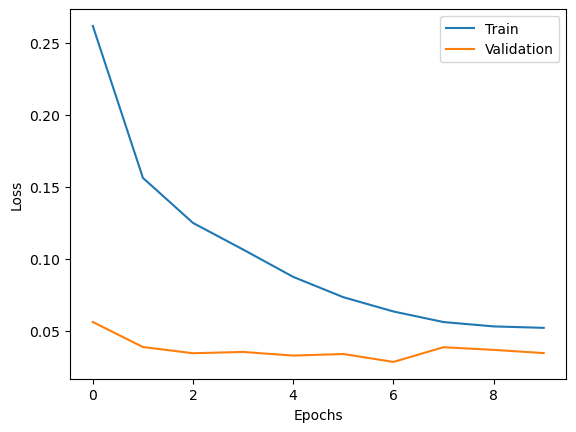

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

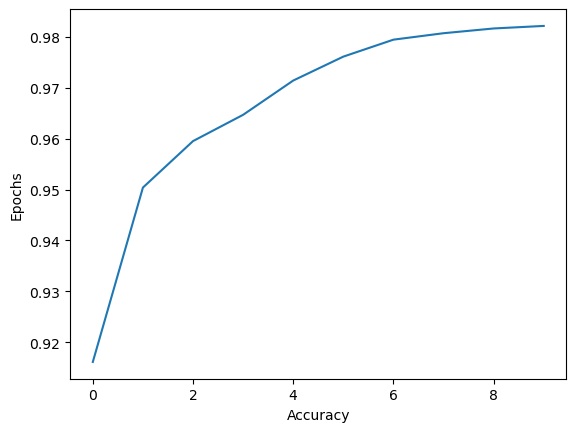

In [30]:
plt.plot(history.history['accuracy'])
plt.xlabel('Accuracy')
plt.ylabel('Epochs')
plt.show()

In [40]:
import tkinter as tk
from PIL import Image, ImageDraw
import numpy as np

DIM = 500

WINDOW = tk.Tk()
WINDOW.title('Digit Recognition')

canvas = tk.Canvas(WINDOW, width=DIM, height=DIM - 100, bg='black')
canvas.pack()

img = Image.new('L', (DIM, DIM - 100), 'black')
draw = ImageDraw.Draw(img)

def on_mouse_drag(event):
    x, y = event.x, event.y
    rect_size = 10
    canvas.create_rectangle(x, y, x + rect_size, y + rect_size, fill='white')
    draw.rectangle([x, y, x + rect_size, y + rect_size], fill='white') 
    
def clear_canvas():
    canvas.delete('all')
    draw.rectangle((0, 0, DIM, DIM - 100), fill='black')
    
canvas.bind('<B1-Motion>', on_mouse_drag)

button_clear = tk.Button(WINDOW, text='Clear', command=clear_canvas)
button_clear.pack()

label_result = tk.Label(WINDOW, text='')
label_result.pack()

def predict_digit():
    image = img.resize((28, 28)).convert('L')
    image_array = np.array(image) / 255.0
    image_array = np.expand_dims(image_array, axis=0)
    image_array = np.expand_dims(image_array, axis=-1)
    prediction = model.predict(image_array)
    predicted_digit = np.argmax(prediction)
    label_result['text'] = f'Predicted Digit: {predicted_digit}'
    
button_predict = tk.Button(WINDOW, text='Predict', command=predict_digit)
button_predict.pack()

WINDOW.mainloop()